# Iris Flower Classification ML Project

In this particular project, we will try to understand. Below is the image of the Iris flowers, we want to analyse.

# Import Necessary Packages

In [1]:
import numpy as np
import pandas as pd 
from pandas import Series, DataFrame
import seaborn as sns
from matplotlib import pyplot as plt
from PIL import Image

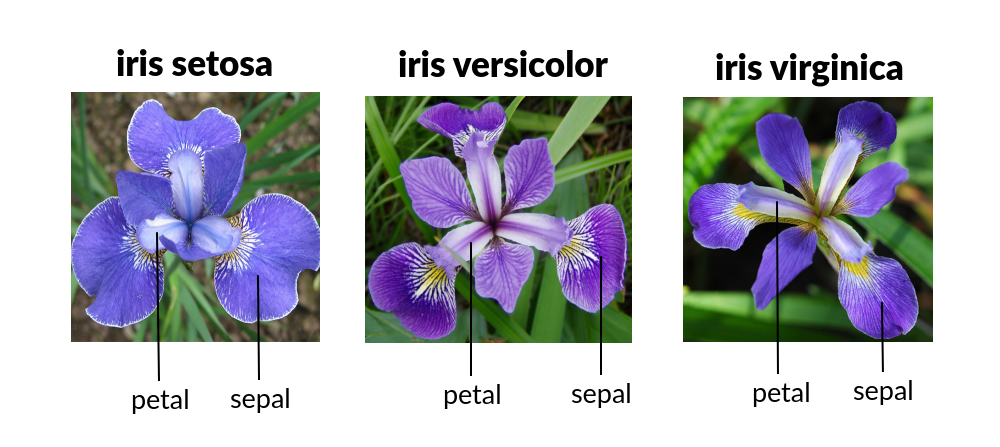

In [2]:
iris_flowers = Image.open('iris flower.png')
iris_flowers

# Now read the dataset

In [3]:
df=pd.read_csv('Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.shape # The dimensions of the datasets

(150, 6)

# Clean the data, as there is redundant ID column.

In [9]:
df.drop('Id',axis=1,inplace=True)

# Exploratory Data Analysis EDA

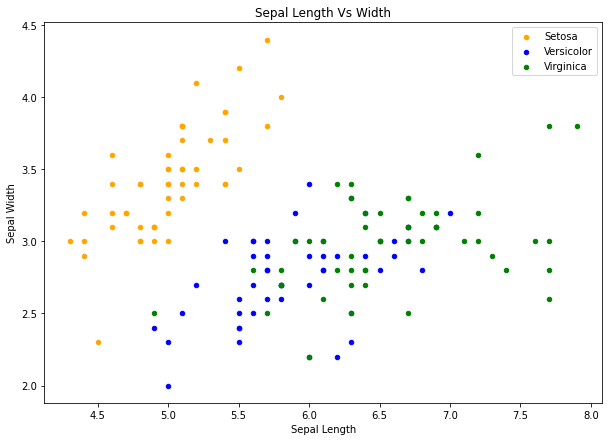

In [10]:
fig = df[df.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='orange', label='Setosa')
df[df.Species == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='Versicolor', ax=fig)
df[df.Species == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

C:\Users\MGJil\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


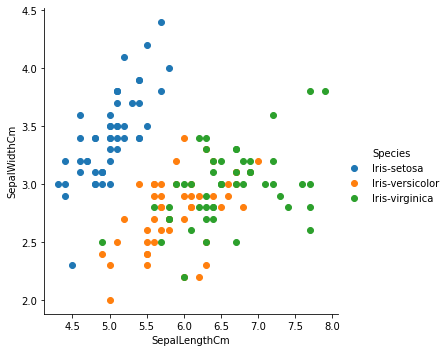

In [11]:
sns.FacetGrid(df, hue='Species', size=5).map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm').add_legend()
plt.savefig('Sepal_LengthVsWidth_1.jpeg')

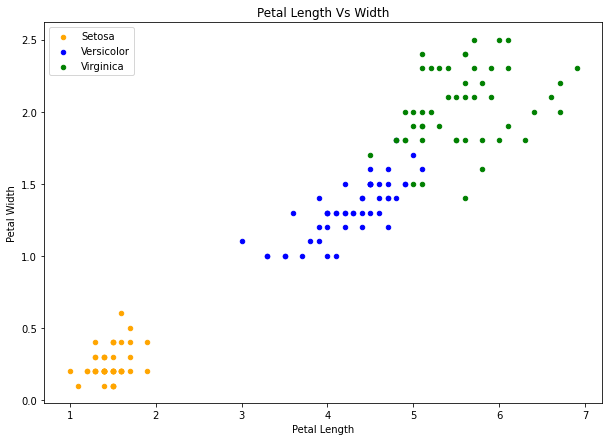

<Figure size 432x288 with 0 Axes>

In [12]:
fig = df[df.Species == 'Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='orange', label='Setosa')
df[df.Species == 'Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='blue', label='Versicolor', ax=fig)
df[df.Species == 'Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()
plt.savefig('Petal_LengthVsWidth.jpeg')

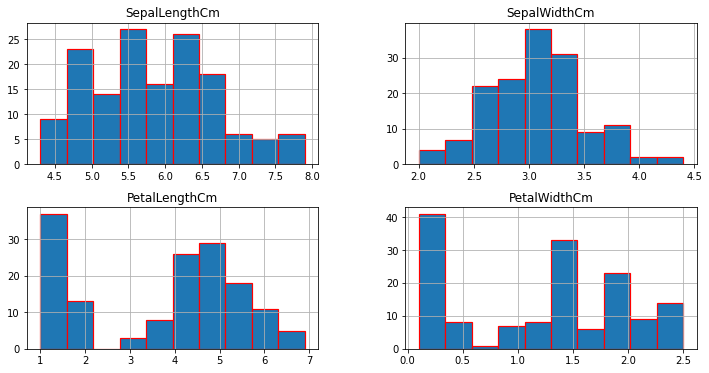

In [13]:
df.hist(edgecolor='red', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

# Now We can apart from Sepal Width are not normally distributed.

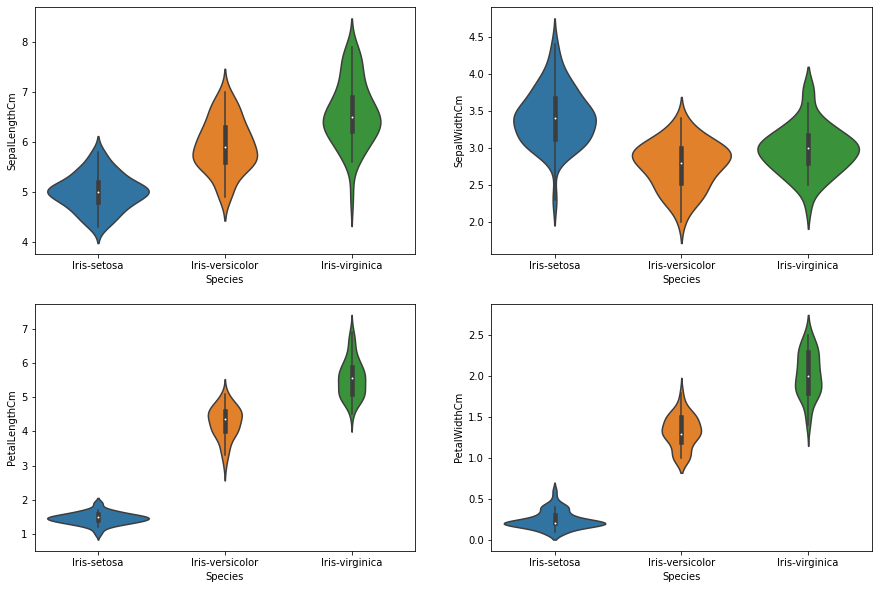

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species', y = 'SepalLengthCm', data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species', y = 'SepalWidthCm', data=df)

plt.subplot(2,2,3)
sns.violinplot(x='Species', y = 'PetalLengthCm', data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species', y = 'PetalWidthCm', data=df)
plt.savefig('violionplot.jpeg')

# Now Label Encoder

In [15]:
from sklearn.preprocessing import LabelEncoder   ## Converting the labels into numeric form to convert them into machine readable form

In [16]:
encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

In [17]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Splitting the iris dataset


In [18]:
X = df.drop(columns = ['Species'],axis=1)
y = df['Species']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) # train=70% and test=30% 

# Now Check the shape of the X_train and X_test also y_train and y_test

In [21]:
print(X_train.shape)
print(X_test.shape)

(105, 4)
(45, 4)


In [22]:
print(y_train.shape)
print(y_test.shape)

(105,)
(45,)


# Now Modeling Part

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Now Logistic Regression

In [24]:
log_reg = LogisticRegression()     ## Assigning the model 

log_reg.fit(X_train, y_train)      ## Fitting the model with the training data
y_pred = log_reg.predict(X_test) # Predict The Model

print(f'The accuracy of the Logistic Regression Model is: {accuracy_score(y_pred, y_test)*100}')  ## Printing the accuracy of the model

The accuracy of the Logistic Regression Model is: 97.77777777777777


# Now SVC Model

In [28]:
svc = SVC() # select the svc algorithm

# we train the algorithm with training data and training output
svc.fit(X_train, y_train)

# we pass the testing data to the stored algorithm to predict the outcome
y_pred = svc.predict(X_test)

print(f'The accuracy of the SVC is: {accuracy_score(y_pred, y_test)*100}') # we check the accuracy of the algorithm

The accuracy of the SVC is: 97.77777777777777


# Now DecisionTreeClassifier

In [26]:
dec_tree_class = DecisionTreeClassifier()

# we train the algorithm with training data and training output
dec_tree_class.fit(X_train, y_train)

# we pass the testing data to the stored algorithm to predict the outcome
y_pred = dec_tree_class.predict(X_test)

print(f'The accuracy of the Decision Tree Classifier Model is: {accuracy_score(y_pred, y_test)*100}')

The accuracy of the Decision Tree Classifier Model is: 97.77777777777777


# Now k-Nearest Neighbours

In [27]:
KNC = KNeighborsClassifier()

# we train the algorithm with training data and training output
KNC.fit(X_train, y_train)

# we pass the testing data to the stored algorithm to predict the outcome
y_pred = KNC.predict(X_test)

print(f'The accuracy of the k-Nearest Neighbours Model is: {accuracy_score(y_pred, y_test)*100}')

The accuracy of the k-Nearest Neighbours Model is: 97.77777777777777
